In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
#  -U git+https://github.com/CompRhys/aviary.git

In [3]:
df = pd.read_feather('pairs_data.feather')
df

,ratio,dist,id_1,pretty_formula_1,space_group_1,id_2,pretty_formula_2,space_group_2
0,5:3,0.075454,mp-31172,Ca5Ag3,I4/mcm,mp-571212,Yb5Ag3,I4/mcm
1,5:3,2.008706,mp-31172,Ca5Ag3,I4/mcm,mp-1501,Al3Pt5,Pbam
2,5:3,2.300419,mp-31172,Ca5Ag3,I4/mcm,mp-16514,Al3Ni5,Cmmm
3,5:3,1.506156,mp-31172,Ca5Ag3,I4/mcm,mp-10047,Ca5As3,P6_3/mcm
4,5:3,1.428876,mp-31172,Ca5Ag3,I4/mcm,mp-1106024,Eu5As3,P6_3/mcm
...,...,...,...,...,...,...,...,...
15063717,2:1:1,0.061459,mp-999137,SmTlSe2,R-3m,mp-1065514,YTlTe2,R-3m
15063718,2:1:1,2.728159,mp-999137,SmTlSe2,R-3m,mp-1187870,YTmTl2,Fm-3m
15063719,2:1:1,0.122831,mp-1008561,TmTlTe2,R-3m,mp-1065514,YTlTe2,R-3m
15063720,2:1:1,2.711075,mp-1008561,TmTlTe2,R-3m,mp-1187870,YTmTl2,Fm-3m


In [4]:
elem_embs = pd.read_json('https://raw.githubusercontent.com/CompRhys/aviary/refs/heads/main/aviary/embeddings/element/megnet16.json')
elem_embs

,Null,H,He,Li,Be,B,C,N,O,F,...,At,Rn,Fr,Ra,Ac,Th,Pa,U,Np,Pu
0,-0.044911,0.352363,-0.067220,-0.161449,-0.111666,0.260108,0.398148,0.611494,-0.113972,-0.308105,...,0.013335,-0.011944,-0.043450,0.016968,-0.918221,-0.353667,-0.498012,-0.061629,-0.471240,-0.278194
1,0.004152,0.635952,0.141113,0.179496,0.760182,0.707898,0.744485,0.001810,-0.188673,-0.575614,...,0.024167,0.017634,0.042720,-0.025037,0.073024,-0.067413,0.487307,0.243641,0.448124,0.044107
2,0.012933,0.217338,0.164495,-0.114184,0.057829,0.064846,0.662636,0.620457,0.108998,-0.171835,...,-0.009026,-0.005495,-0.044104,0.031968,-0.595052,-0.824566,-0.745676,-0.346598,-0.170911,-0.154820
3,-0.010163,-0.191956,0.136701,0.136510,0.250147,-0.300478,-0.520578,-0.446009,0.214548,0.462324,...,0.046445,-0.009977,0.007274,-0.017894,0.450472,-0.025612,-0.009069,0.056789,0.299127,0.376608
4,0.007606,0.253751,0.016505,0.106477,-0.396934,-0.510219,-0.673885,0.094431,0.371144,0.702146,...,0.003559,-0.030206,-0.023090,-0.027510,-0.345009,-0.346526,-0.263530,-0.442932,-0.490186,-0.445192
5,0.029269,-0.423261,0.073929,0.047109,0.128850,0.082544,-0.476654,-0.817922,-0.103028,0.220106,...,0.030743,-0.048440,0.029772,0.013903,0.607715,0.809945,0.749626,0.640021,0.501166,0.493097
6,0.033980,0.221297,0.151093,0.065104,0.037942,0.589792,0.698720,-0.130236,-0.404307,-0.503306,...,-0.014643,-0.007266,0.023424,-0.024473,-0.072247,0.161332,0.464819,0.237543,0.197754,-0.023476
7,0.018202,-0.452411,-0.138170,-0.069099,0.135463,0.523288,0.607385,-0.645908,-0.502800,-0.394980,...,-0.016754,-0.025606,-0.033319,0.042808,0.179490,0.469464,0.553796,0.706783,0.673036,0.487316
8,0.042308,-1.007713,-0.180052,-0.210581,-0.202221,-0.672266,-0.562160,0.021001,0.313225,0.283450,...,0.046804,0.004872,0.038471,-0.026307,0.290643,0.045801,-0.281812,0.170462,0.243258,0.303537
9,-0.019320,-0.289936,-0.130642,-0.030035,-0.046165,0.490484,0.673558,-0.271362,-0.465547,-0.584290,...,0.003551,0.044316,-0.016308,-0.023788,0.057812,0.178863,0.412992,0.436729,0.359024,0.260558


In [5]:
import torch
import torch.nn.functional as F
from aviary.roost.model import DescriptorNetwork
from pymatgen.core import Composition
from torch import Tensor, LongTensor
from data import collate_batch, comp2graph

device = 'cuda'
torch.set_default_device(device)



elem_embed_dim = 112
comp_embed_dim = 64

batch = collate_batch([comp2graph(x) for x in df.sample(16)['pretty_formula_1']])
print([tuple(x.shape) for x in batch])

gnn = DescriptorNetwork(elem_emb_len=elem_embed_dim, elem_fea_len=64)

out = gnn(*batch)

print(out.shape)
out

[(47, 1), (47, 112), (141,), (141,), (47,)]
torch.Size([16, 64])


tensor([[ 0.0714, -0.0142, -0.0223,  ...,  0.0297, -0.0424, -0.0344],
        [ 0.0777, -0.0026, -0.0154,  ...,  0.0301, -0.0338, -0.0293],
        [ 0.0769, -0.0132, -0.0269,  ...,  0.0379, -0.0455, -0.0405],
        ...,
        [ 0.0692, -0.0087, -0.0281,  ...,  0.0318, -0.0491, -0.0375],
        [ 0.0687, -0.0143, -0.0198,  ...,  0.0257, -0.0327, -0.0304],
        [ 0.0707, -0.0157, -0.0196,  ...,  0.0278, -0.0331, -0.0399]],
       device='cuda:0', grad_fn=<MeanBackward1>)

In [6]:
benchmark = pd.read_csv('https://raw.githubusercontent.com/usccolumbia/cspbenchmark/main/data/CSPbenchmark_test_data.csv')
benchmark_ids = benchmark['material_id']

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split, IterableDataset
from tqdm import trange

fn = 'ds-oh.pt'
regen = False

tau = 1.0
val_frac = 0.1
batch_size = 256
df_train = df.iloc[::100].query('dist > 0.01')
print(df_train.shape)
df_train = df_train.query('id_1 not in @benchmark_ids and id_2 not in @benchmark_ids')
print(df_train.shape)
df_train = df_train.iloc[:-(df_train.shape[0] % batch_size)]
print(df_train.shape)
print((df_train['dist'] < tau).mean())

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X1, X2, y):
        self.X1 = X1
        self.X2 = X2
        self.y = y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.y[idx]
if regen:
    X1 = []
    X2 = []
    y = []
    for i in trange(0, len(df_train.index), batch_size):
        df_batch = df_train.iloc[i:i+batch_size]
        X1.append(collate_batch([comp2graph(x) for x in df_batch['pretty_formula_1']]))
        X2.append(collate_batch([comp2graph(x) for x in df_batch['pretty_formula_2']]))
        y.append(torch.tensor(df_batch['dist'].values) < tau)



    ds = MyDataset(X1, X2, y)

    torch.save(ds, fn)
else:
    ds = torch.load(fn, weights_only=False)
    

train_ds, val_ds = random_split(ds, [1 - val_frac, val_frac], generator=torch.Generator(device=device).manual_seed(123))
train_dl = DataLoader(train_ds, batch_size=None, shuffle=True, generator=torch.Generator(device=device))
val_dl = DataLoader(val_ds, batch_size=None)
val_X1, val_X2, val_y = next(iter(val_dl))

(118778, 8)
(117777, 8)
(117760, 8)
0.10809273097826087


In [8]:
lr = 3e-3  # 1 * 10^-3 0.001
num_epochs = 20
elem_embed_dim: int = 128
comp_embed_dim: int = 128

Train: 0.261 Valid: 0.293: 100%|██████████| 8280/8280 [04:36<00:00, 29.98it/s]


<Axes: xlabel='Epoch', ylabel='Train Loss'>

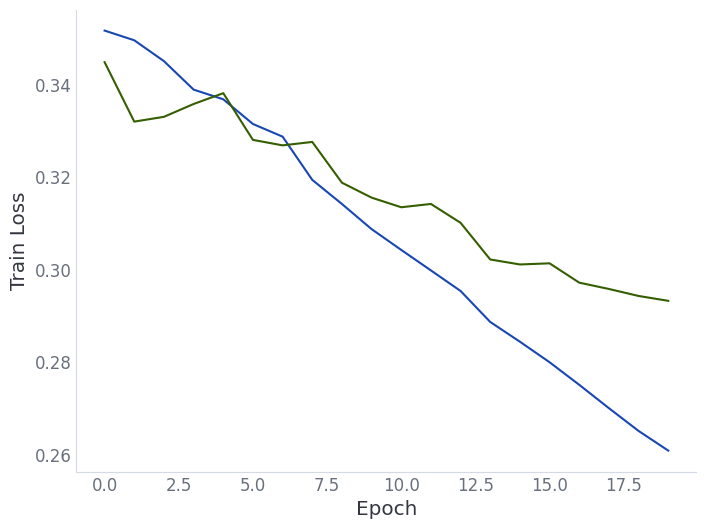

In [9]:
from tqdm import trange
from model import CompositionEmbedding

hist = []
model = CompositionEmbedding(elem_input_dim=112, elem_hidden_dim=elem_embed_dim, comp_embed_dim=comp_embed_dim)
# model = torch.load('checkpoints/test.pt', weights_only=False).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.PolynomialLR(optimizer, total_iters=num_epochs)

with trange(num_epochs * len(train_dl)) as bar:
    for epoch in range(num_epochs):
        model.train()
        loss_vals = []
        for X1, X2, y in train_dl:
            bar.update()
            optimizer.zero_grad()
            loss_val = F.binary_cross_entropy(model(X1, X2), y.float())
            loss_val.backward()
            optimizer.step()
            loss_vals.append(loss_val.detach().item())
            if (bar.n + 1) % 100 == 0:
                bar.set_description_str('Train: {:.3f} Valid: {:.3f}'.format(loss_vals[-1],  hist[-1]["Validation Loss"] if hist else 0))
        model.eval()
        with torch.no_grad():
            val_losses = []
            for X1, X2, y in val_dl:
                val_losses.append(F.binary_cross_entropy(model(X1, X2), y.float()))

            val_losses = torch.tensor(val_losses)
        hist.append({
            'Epoch': epoch,
            'Train Loss': sum(loss_vals) / len(loss_vals),
            'Validation Loss': val_losses.mean().item()
        })

        bar.set_description_str('Train: {:.3f} Valid: {:.3f}'.format(hist[-1]["Train Loss"], hist[-1]["Validation Loss"]))
        scheduler.step()

hist = pd.DataFrame(hist)

sns.lineplot(hist, x='Epoch', y='Train Loss')
sns.lineplot(hist, x='Epoch', y='Validation Loss')

In [16]:
ypred = []
ytrue = []
for X1, X2, y in val_dl:
    ypred.append(model(X1, X2))
    ytrue.append(y)

ypred = torch.cat(ypred)
ytrue = torch.cat(ytrue)

In [17]:
((ypred > 0.5) == ytrue).float().mean()

tensor(0.8910, device='cuda:0')

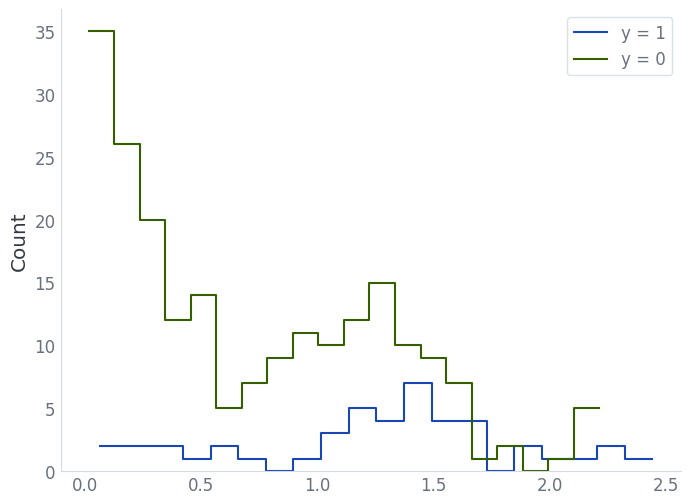

In [18]:
dists = torch.linalg.vector_norm(model.embed(X1) - model.embed(X2), dim=1).numpy(force=True)
y_np = y.numpy(force=True)

sns.histplot(x=dists[y_np], label='y = 1', fill=False, element='step', bins=20)
sns.histplot(x=dists[~y_np], label='y = 0', fill=False, element='step', bins=20)
plt.legend()

- train from CIF folder
- oxidation state (BERTOS), make nodes

In [13]:
mp_id = 'mp-5615'

df_id = df.query('id_1 == @mp_id')

X1 = collate_batch([comp2graph(df_id['pretty_formula_1'].iloc[0])])

x2s = df_id['pretty_formula_2']

X2 = []
for i in range(0, x2s.shape[0], batch_size):
    X2.append(collate_batch([comp2graph(c) for c in x2s.iloc[i:i+batch_size]]))

model.eval()
z1 = model.embed(X1)
z2 = torch.cat([model.embed(x) for x in X2])

dists = torch.cdist(z1, z2)
df_id['z_dist'] = dists.numpy(force=True).reshape(-1)

/tmp/ipykernel_2826668/80064420.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['z_dist'] = dists.numpy(force=True).reshape(-1)


In [14]:
df_id.sort_values('z_dist')

,ratio,dist,id_1,pretty_formula_1,space_group_1,id_2,pretty_formula_2,space_group_2,z_dist
5197256,1:1:1,2.357444,mp-5615,CaAgAs,P-62m,mp-1018162,CeBiPt,F-43m,0.024687
5197299,1:1:1,1.163810,mp-5615,CaAgAs,P-62m,mp-24423,SrHBr,P4/nmm,0.028786
5197195,1:1:1,1.534383,mp-5615,CaAgAs,P-62m,mp-11819,BaSnHg,P6_3/mmc,0.030443
5197213,1:1:1,1.628340,mp-5615,CaAgAs,P-62m,mp-29463,LiBeN,P2_1/c,0.031601
5197183,1:1:1,1.489629,mp-5615,CaAgAs,P-62m,mp-1228081,BaHgPb,C2/m,0.031792
...,...,...,...,...,...,...,...,...,...
5198208,1:1:1,0.930545,mp-5615,CaAgAs,P-62m,mp-1095442,HfVP,Pnma,1.314283
5198692,1:1:1,0.889309,mp-5615,CaAgAs,P-62m,mp-13025,YbZnPd,Pnma,1.329642
5198209,1:1:1,0.540941,mp-5615,CaAgAs,P-62m,mp-1101952,HfSiNi,Pnma,1.351882
5198740,1:1:1,0.751260,mp-5615,CaAgAs,P-62m,mp-1188590,TaReSi,Ima2,1.414078


In [15]:
torch.save(model, 'checkpoints/test.pt')